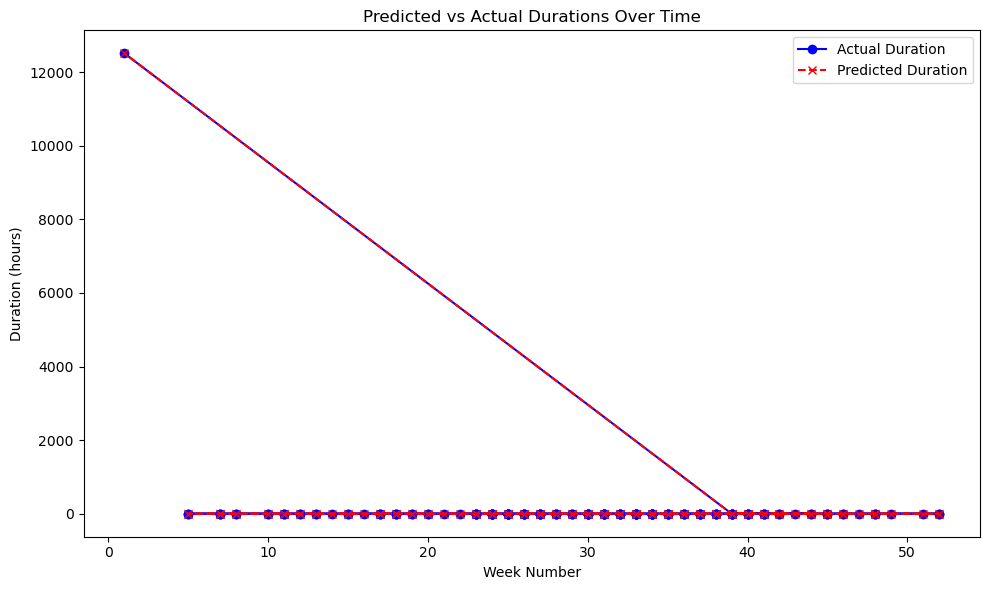


Performance Feedback Sample:
   Week  Duration Improvement Feedback Performance vs Weekly Avg  \
0    44  0.983333           Stagnation             Below Average   
1    44  0.800000           Stagnation             Below Average   
2    43  0.666667           Stagnation             Below Average   
3    41  0.800000           Stagnation             Below Average   
4    40  0.783333           Stagnation             Below Average   

  Prediction Feedback  
0  Improvement Needed  
1                Good  
2                Good  
3  Improvement Needed  
4  Improvement Needed  


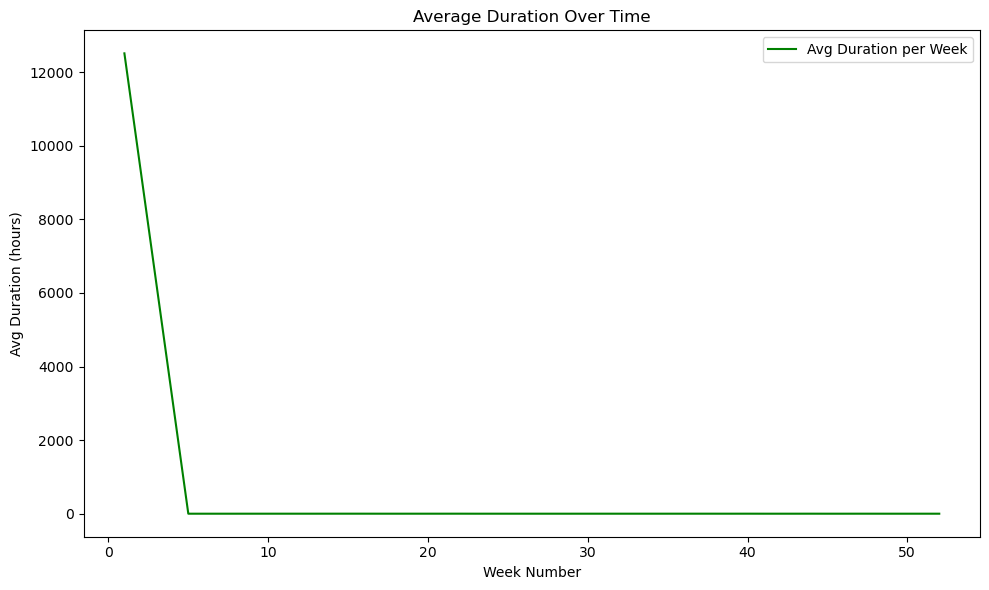

OverflowError: Python int too large to convert to C long

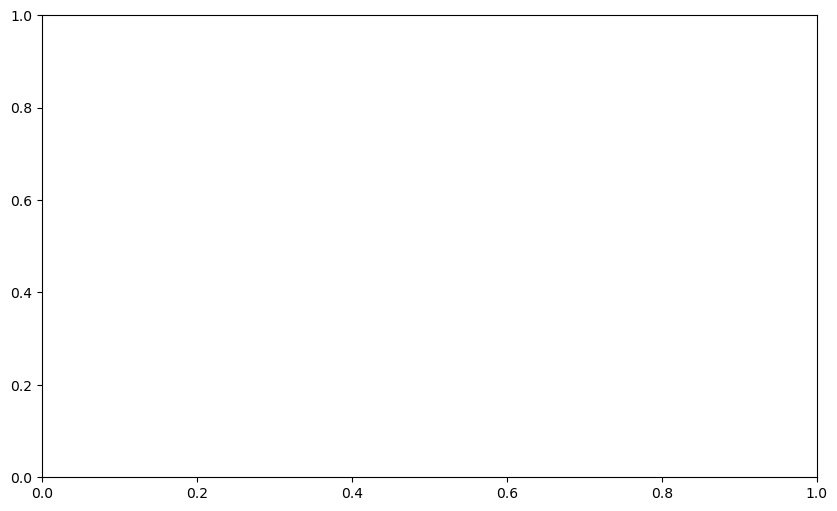

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#load and preprocess data 
csv_file = "C:/Users/nasik/Downloads/activities_cleaned (2).csv"
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"{csv_file} not found. Please place it in the current directory.")

# Load the dataset
df = pd.read_csv(csv_file)

# Convert timestamps to datetime
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'], format="%d/%m/%Y %H:%M")
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'], format="%d/%m/%Y %H:%M")



df['Duration'] = (df['End Timestamp'] - df['Begin Timestamp']).dt.total_seconds() / 3600  # in hours
df['Week'] = df['Begin Timestamp'].dt.isocalendar().week
df['Month'] = df['Begin Timestamp'].dt.month

weekly_summary = df.groupby('Week')['Duration'].agg(['sum', 'mean']).reset_index()
monthly_summary = df.groupby('Month')['Duration'].agg(['sum', 'mean']).reset_index()


np.random.seed(0)
df['Predicted Duration'] = df['Duration'] + np.random.normal(0, 0.5, size=len(df))

# Plot predicted vs actual durations
plt.figure(figsize=(10, 6))
plt.plot(df['Week'], df['Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(df['Week'], df['Predicted Duration'], label='Predicted Duration', color='red', linestyle='--', marker='x')
plt.title('Predicted vs Actual Durations Over Time')
plt.xlabel('Week Number')
plt.ylabel('Duration (hours)')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 4: Performance Feedback
# -------------------------------

# Calculate week-by-week improvement
df['Duration Improvement'] = df.groupby('Week')['Duration'].diff()
df['Improvement Feedback'] = np.where(df['Duration Improvement'] > 0, 'Improvement', 'Stagnation')

# Compare with weekly average
weekly_avg_duration = weekly_summary['mean'].mean()
df['Performance vs Weekly Avg'] = np.where(df['Duration'] > weekly_avg_duration, 'Above Average', 'Below Average')

# Prediction accuracy feedback
df['Prediction Error'] = df['Predicted Duration'] - df['Duration']
df['Prediction Feedback'] = np.where(df['Prediction Error'].abs() < 0.5, 'Good', 'Improvement Needed')


print("\nPerformance Feedback Sample:")
print(df[['Week', 'Duration', 'Improvement Feedback', 'Performance vs Weekly Avg', 'Prediction Feedback']].head())

plt.figure(figsize=(10, 6))
plt.plot(weekly_summary['Week'], weekly_summary['mean'], label='Avg Duration per Week', color='green')
plt.title('Average Duration Over Time')
plt.xlabel('Week Number')
plt.ylabel('Avg Duration (hours)')
plt.legend()
plt.tight_layout()
plt.show()

# Calories burned (if available)
if 'Calories' in df.columns:
    plt.figure(figsize=(10, 6))
    weekly_calories = df.groupby('Week')['Calories'].sum().reset_index()
    plt.plot(weekly_calories['Week'], weekly_calories['Calories'], label='Calories Burned', color='orange')
    plt.title('Calories Burned Over Time')
    plt.xlabel('Week Number')
    plt.ylabel('Calories Burned')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'Calories' column not found. Skipping calories plot.")

# -------------------------------
# Step 6: Save Feedback Report
# -------------------------------

feedback_df = df[['Week', 'Duration', 'Predicted Duration', 'Improvement Feedback', 
                  'Performance vs Weekly Avg', 'Prediction Feedback']]
feedback_df.to_csv('runner_progress_feedback.csv', index=False)
print("\n✅ Progress feedback saved as 'runner_progress_feedback.csv'.")
